In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()

--2024-06-16 14:37:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   207MB/s    in 0.5s    

2024-06-16 14:37:24 (207 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
import tensorflow as tf
from keras.preprocessing import image_dataset_from_directory
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

In [3]:
train_dataset = image_dataset_from_directory(
    directory="/content/pizza_steak/train",
    seed=123,  # Random seed for reproducibility
    image_size=(224, 224),  # Resize images to 224x224
    label_mode="binary",
    batch_size=32  # Number of images to retrieve in each batch
)

test_dataset = image_dataset_from_directory(
    directory="/content/pizza_steak/test",
    seed=123,  # Random seed for reproducibility
    image_size=(224, 224),  # Resize images to 224x224
    label_mode="binary",
    batch_size=32  # Number of images to retrieve in each batch
)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [4]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom, Input
data_augmentation = tf.keras.Sequential([
    Rescaling(1./255, input_shape=(224, 224, 3)),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomFlip("horizontal_and_vertical")
])

In [14]:

model = Sequential(
    layers=[
        Input(shape=(224, 224, 3)),
        data_augmentation,
        Conv2D(32, 3, padding="same", activation="relu"),
        Conv2D(10, 3, activation="relu"),
        MaxPooling2D(pool_size=2, padding="valid"),
        Conv2D(10, 3, activation="relu"),
        Conv2D(10, 3, activation="relu"),
        MaxPooling2D(2),
        Flatten(),
        Dense(1, activation="sigmoid")
    ]
)
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [15]:
history = model.fit(train_dataset, batch_size=32, epochs=10, steps_per_epoch=len(train_dataset), validation_data=test_dataset, validation_steps=len(test_dataset))

Epoch 1/10
47/47 [==============================] - 5s 65ms/step - loss: 0.6655 - accuracy: 0.6107 - val_loss: 0.5074 - val_accuracy: 0.7960
Epoch 2/10
47/47 [==============================] - 3s 61ms/step - loss: 0.5006 - accuracy: 0.7600 - val_loss: 0.4866 - val_accuracy: 0.7460
Epoch 3/10
47/47 [==============================] - 3s 64ms/step - loss: 0.4745 - accuracy: 0.7753 - val_loss: 0.4327 - val_accuracy: 0.8020
Epoch 4/10
47/47 [==============================] - 3s 67ms/step - loss: 0.4516 - accuracy: 0.7913 - val_loss: 0.3796 - val_accuracy: 0.8460
Epoch 5/10
47/47 [==============================] - 3s 69ms/step - loss: 0.4418 - accuracy: 0.7980 - val_loss: 0.4048 - val_accuracy: 0.8180
Epoch 6/10
47/47 [==============================] - 3s 68ms/step - loss: 0.4350 - accuracy: 0.8080 - val_loss: 0.3452 - val_accuracy: 0.8580
Epoch 7/10
47/47 [==============================] - 4s 75ms/step - loss: 0.4321 - accuracy: 0.8053 - val_loss: 0.3621 - val_accuracy: 0.8440
Epoch 8/10
47

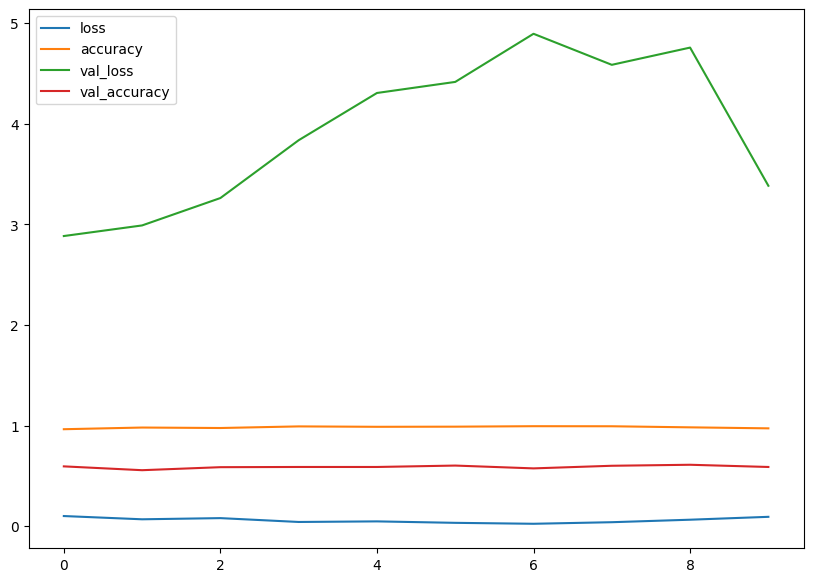

In [8]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));


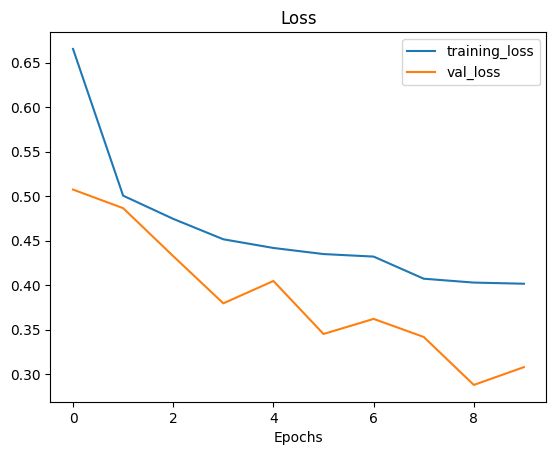

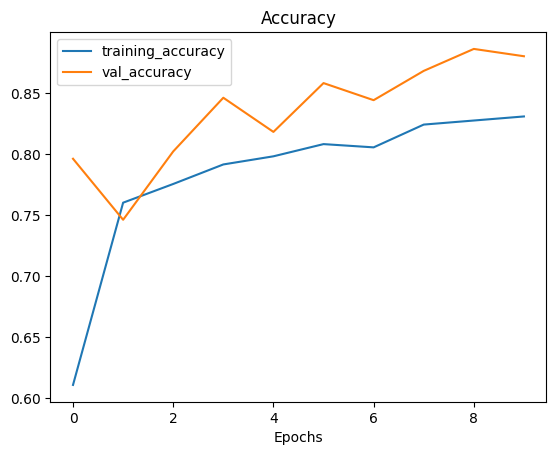

In [16]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

plot_loss_curves(history)

In [18]:
from keras.preprocessing import image
def load_and_preprocess_image(image_path, target_size):
    # Load the image
    img = image.load_img(image_path, target_size=target_size)

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Expand dimensions to match the model's input shape (e.g., (1, 224, 224, 3))
    img_array = np.expand_dims(img_array, axis=0)

    # Normalize the image if the model expects normalized images
    img_array = img_array / 255.0  # or use tf.keras.applications.imagenet_utils.preprocess_input() for certain models

    return img_array


In [21]:
import numpy as np
prep_image = load_and_preprocess_image("/content/pizza_steak/test/pizza/1001116.jpg", (224, 224, 3))

model.predict(prep_image)

1/1 [==============================] - 1s 855ms/step


array([[0.5252199]], dtype=float32)